<a href="https://colab.research.google.com/github/Gustavo-Bruges/ciencia-de-datos-unab/blob/notebooks/EDA_pandas_netflix_enunciados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# \# Análisis Exploratorio de Datos. PROGRAMA DE CIENCIA DE DATOS UNAB
## Dataset: Netflix (`netflix_data.csv`)  
**Objetivo:** este cuaderno contiene únicamente *enunciados* (guía de trabajo) para desarrollar un EDA paso a paso con **pandas**.  

**Archivo de entrada esperado:** `netflix_data.csv` (en este entorno, suele estar disponible en `/mnt/data/netflix_data.csv`).  

**Fecha de generación:** 06 Enero 2026


---

## 1. Introducción al análisis exploratorio de datos

1. Define con tus palabras qué es el análisis exploratorio de datos (EDA) y por qué es una etapa previa necesaria antes de modelar.
2. Propón 5 preguntas analíticas que te gustaría responder con este dataset (ejemplos: tendencias temporales, distribución de géneros, países con más títulos, duración, etc.).
3. Identifica qué sesgos o limitaciones podrían esperarse en una base de datos de catálogo (cobertura, cambios en el tiempo, variables faltantes, etc.).


# **CARGAR EL AMBIENTE DE DRIVE CON EL MÓDULO GOOGLE COLAB**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# CARGAR EL MÓDULO OS
Este módulo proporciona una forma portátil de utilizar funcionalidades que dependen del sistema operativo.

In [2]:
import os
os.getcwd()

'/content'

In [3]:
path = '/content/drive/MyDrive/ciencia_de_datos'

In [4]:
os.chdir(path)

In [6]:
os.listdir()

['netflix_data.csv',
 'regicor.csv',
 'Untitled0.ipynb',
 'stations.p',
 'actors_movies.csv',
 'casts.p',
 'crews.p',
 'taglines.p',
 'S&P500.csv',
 'WorldBank_GDP.csv',
 'WorldBank_POP.csv',
 'taxi_owners.csv',
 'taxi_vehicles.csv',
 'Chicago_wards.csv',
 'Chicago_census.csv',
 'licenses.csv',
 'zip_demo.csv',
 'business_owners.csv',
 'land_use.csv',
 'cta_ridership.csv',
 'cta_calendar.csv',
 'movies.csv',
 'ratings.csv',
 'movie_to_genres.csv',
 'sequels.csv',
 'financials.csv']

In [ ]:
/content/drive/MyDrive/ciencia_de_datos

EN LA SIGUIENT TAMBIÉN TIENES LA OPCIÓN DE CARGAR TUS DATOS DESDE TU COMPUTADOR

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving biometria.csv to biometria.csv
User uploaded file "biometria.csv" with length 76 bytes


In [ ]:
# REVISAMOS EL CONTENIDO DE NUESTRA CARPETA DRIVE CON ÉL MÉTODO listdir() de os


---

## 2. Preparación del entorno y carga del dataset

1. Importa las librerías necesarias para análisis de datos (al menos `pandas` y `numpy`; opcionalmente `matplotlib` y 'seaborn').


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


2. Carga el archivo `netflix_data.csv` en un DataFrame llamado `netflix_df`.


In [12]:
netflix = pd.read_csv('netflix_data.csv')

3. Verifica que la carga fue exitosa mostrando las primeras 5 a 10 filas.



In [15]:
print(netflix.tail(1))

     show_id   type   title     director  \
4811   s7784  Movie  Zubaan  Mozez Singh   

                                                   cast country  \
4811  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   India   

         date_added  release_year  duration  \
4811  March 2, 2019          2015       111   

                                            description   genre  
4811  A scrappy but poor boy worms his way into a ty...  Dramas  


4. Comprueba si las columnas fueron interpretadas con los tipos de datos esperados (por ejemplo, fechas como `datetime`, números como `int/float`).

In [16]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


---

## 3. Estructura y “mapa” del DataFrame

1. Reporta dimensiones (filas, columnas).
2. ¿Cuáles variables consideras categóricas de interés?
3. ¿Podemos hacer una representación gráfica?


# DIMENSION DE LA DATA.FRAME

In [17]:
netflix.shape

(4812, 11)

In [18]:
filas,columnas = netflix.shape

In [21]:
print(f"La data frame netflix tiene {filas} filas y tiene {columnas} columnas")

La data frame netflix tiene 4812 filas y tiene 11 columnas


# NOMBRES DE LAS COLUMNAS

In [22]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

# ¿CÓMO PUEDO DESCRIBIR DE FORMA GLOBAL MI DATA.FRAME?
## ¿CÓMO DESCRIBIMOS UNA VARIABLE CATEGÓRICA?

In [24]:
round(netflix.describe())

,release_year,duration
count,4812.0,4812.0
mean,2013.0,100.0
std,10.0,31.0
min,1942.0,1.0
25%,2011.0,88.0
50%,2016.0,99.0
75%,2018.0,116.0
max,2021.0,253.0


In [25]:
netflix.describe(include='object')

,show_id,type,title,director,cast,country,date_added,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812,4812
unique,4812,2,4812,3615,4690,72,1292,4807,31
top,s7784,Movie,Zubaan,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",A young Han Solo tries to settle an old score ...,Dramas
freq,1,4677,1,18,10,1886,100,2,1343


---

## 6. EDA univariado (categóricas)

1. Para la variable de tipo de contenido (p. ej., Movie/TV Show):
   - Calcula frecuencias absolutas y relativas
   - Interpreta el balance de clases
2. Para país (`country`) y género/categoría (`genre`):
     - Construye un ranking de países y géneros más frecuentes
3. Para `rating`
   - Evalúa la distribución
  


In [26]:
netflix['type'].value_counts()

,count
type,
Movie,4677
TV Show,135


In [29]:
netflix['genre'].value_counts()*100/filas

,count
genre,
Dramas,27.909393
Comedies,21.384040
Action,14.463840
Children,8.748961
Documentaries,7.315046
Stand-Up,5.881131
Horror Movies,4.966750
International Movies,2.078138
Classic Movies,1.433915


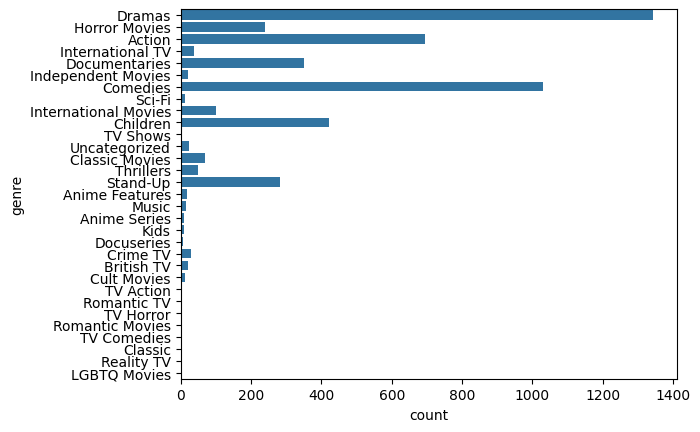

In [33]:
sns.countplot(data=netflix, y='genre')
plt.show()

---

## 7. EDA univariado (numéricas)

1. Para `release_year`:
   - Describe su distribución (mínimo, máximo, mediana, percentiles)
   - Identifica años extremos y valida si son plausibles
2. Para duración numérica (minutos):
   - Resume estadísticos descriptivos
   - Identifica asimetrías (sesgo) y posibles outliers
3. Discute si conviene transformar

In [37]:
print(netflix['release_year'].min())
print(netflix['release_year'].max())
print(netflix['release_year'].median())

1942
2021
2016.0


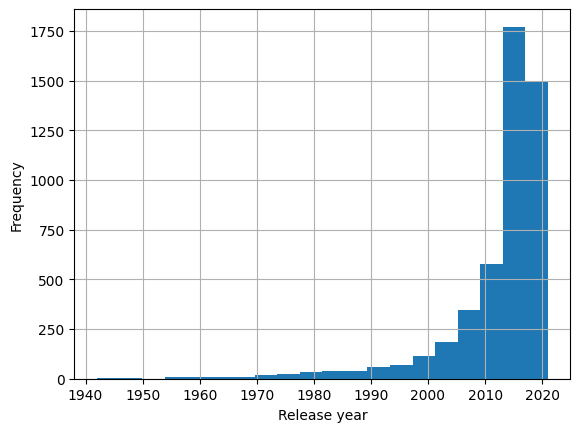

In [42]:
netflix['release_year'].hist(bins=20)
plt.xlabel('Release year')
plt.ylabel('Frequency')
plt.show()

In [56]:
(netflix[(netflix['country']=='India') & # se filtro por La India
 (netflix['type']=='Movie') &  #se filtra con tipo Movie
  (netflix['genre']=='Dramas') & # se filtra por género Drama
   (netflix['release_year'].between(2000,2009))]['duration'].agg(['min','max', 'median', 'mean'])) #metodo between

,duration
min,91.0
max,224.0
median,137.0
mean,141.5


<Axes: >

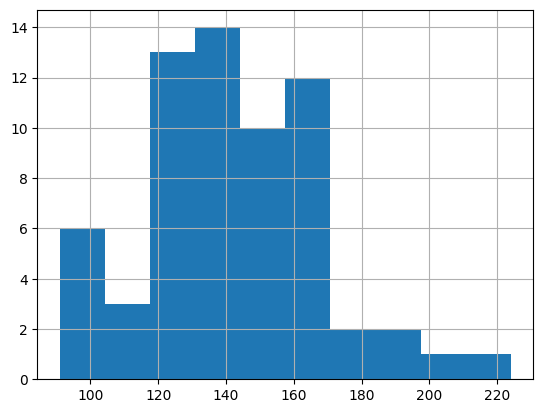

In [57]:
(netflix[(netflix['country']=='India') & # se filtro por La India
 (netflix['type']=='Movie') &  #se filtra con tipo Movie
  (netflix['genre']=='Dramas') & # se filtra por género Drama
   (netflix['release_year'].between(2000,2009))]['duration'].hist()) #metodo between

---

## 10. Visualización básica (con intención analítica)

1. Construye visualizaciones con un propósito explícito:
   - Barras: conteos por tipo, top países, top géneros
   - Histogramas: duración (minutos) para películas

2. En cada gráfico:
   - Especifica la pregunta que responde
   - Define qué patrón esperas ver
   - Interpreta el resultado observado


---

## 11. Variables textuales (introducción ligera)

1. Identifica columnas de texto libre (p. ej., `description`, `cast`, `director`).
2. Define un plan mínimo:
   - Longitud del texto (número de caracteres/palabras)
   - Frecuencias de términos (tokenización básica)
   - Palabras vacías (stopwords) en inglés o español según aplique
3. Plantea hipótesis: ¿el texto de descripción diferencia bien entre géneros o ratings?


---

## 12. Preguntas integradoras (mini-proyecto dentro del cuaderno)

Responde, con evidencia reproducible, al menos 3 de estas preguntas:

1. ¿Qué país tiene mayor cantidad de títulos y cómo cambia esa dominancia en el tiempo?
2. ¿Qué géneros crecen más rápido en títulos agregados por año?
3. ¿Cuál es la duración típica de películas por década de lanzamiento (release_year)?
4. ¿Qué combinación de (tipo, rating) es la más frecuente?
5. ¿Existen indicios de que el catálogo agregado recientemente sea más “nuevo” (menor rezago producción-adición)?


---

## 13. Conclusiones y próximos pasos

1. Resume hallazgos en 8 puntos, separando:
   - Hallazgos descriptivos sólidos
   - Patrones sugerentes (hipótesis)
   - Limitaciones del dataset
